1) Importing the required libraries


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2) Loading the required CSV files

In [165]:
df = pd.read_csv("/content/drive/MyDrive/telco cusomer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3) Displaying the info of the Data Frame

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4) Deleting empty values and Na values from the Data Frame

In [167]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(how='any')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [168]:
cols_to_convert = ['customerID', 'gender', 'Dependents', 'Partner', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
df[cols_to_convert] = df[cols_to_convert].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   string 
 1   gender            7032 non-null   string 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   string 
 4   Dependents        7032 non-null   string 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   string 
 7   MultipleLines     7032 non-null   string 
 8   InternetService   7032 non-null   string 
 9   OnlineSecurity    7032 non-null   string 
 10  OnlineBackup      7032 non-null   string 
 11  DeviceProtection  7032 non-null   string 
 12  TechSupport       7032 non-null   string 
 13  StreamingTV       7032 non-null   string 
 14  StreamingMovies   7032 non-null   string 
 15  Contract          7032 non-null   string 
 16  PaperlessBilling  7032 non-null   string 
 17  

5) Gender Vs Churn


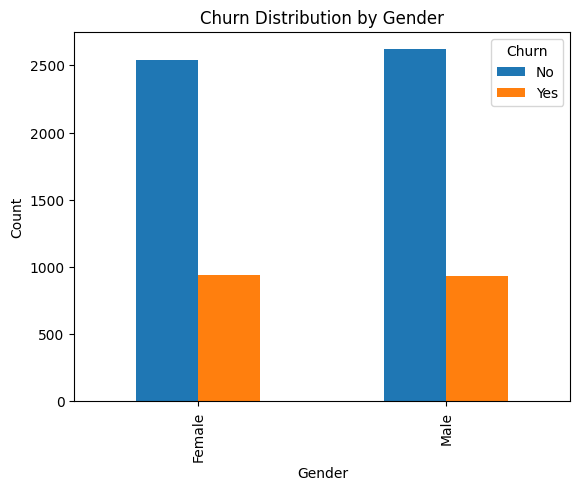

In [169]:
churn_df = df.groupby('gender')['Churn'].value_counts().unstack()


churn_df.plot(kind="bar")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

From the above Bar plot we can observe that there is almost equal amount of churn irrespectuve of gender



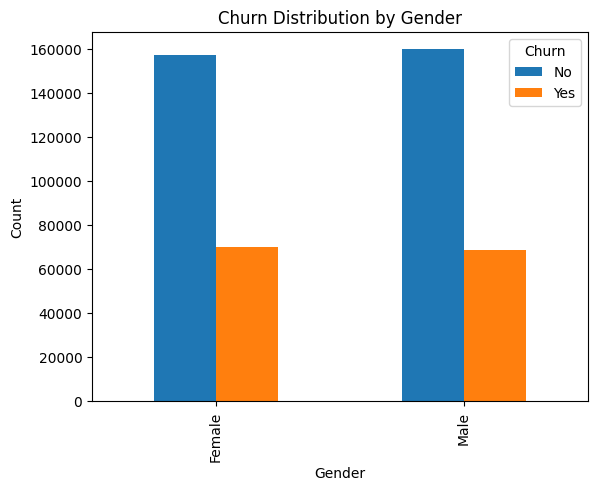

In [170]:
churn_df = df.groupby(['gender','Churn'])['MonthlyCharges'].sum().unstack()


churn_df.plot(kind="bar")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()


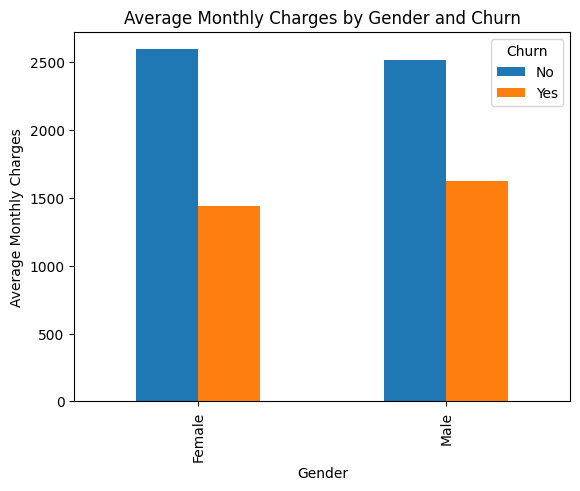

In [171]:
# Group by gender & churn and take mean
churn_df = df.groupby(['gender','Churn'])['TotalCharges'].mean().unstack()

# Plot as bar chart
churn_df.plot(kind="bar")

plt.title("Average Monthly Charges by Gender and Churn")
plt.xlabel("Gender")
plt.ylabel("Average Monthly Charges")
plt.legend(title="Churn")
plt.show()


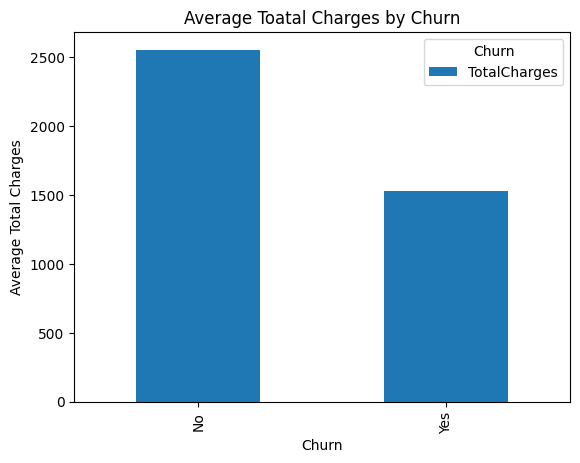

In [172]:
# Group by gender & churn and take mean
churn_df = df.groupby('Churn')['TotalCharges'].mean()

# Plot as bar chart
churn_df.plot(kind="bar")

plt.title("Average Toatal Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Total Charges")
plt.legend(title="Churn")
plt.show()


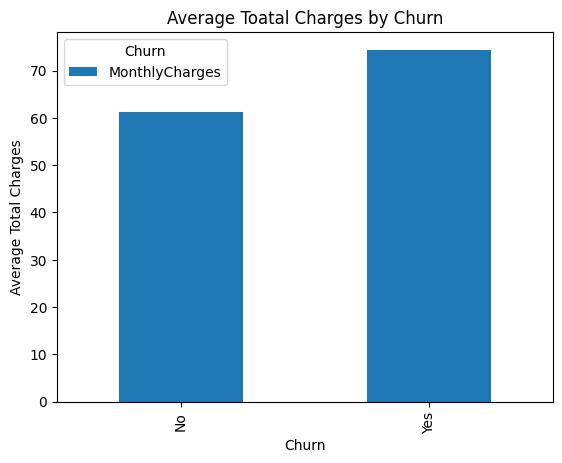

In [173]:
churn_df = df.groupby('Churn')['MonthlyCharges'].mean()

# Plot as bar chart
churn_df.plot(kind="bar")

plt.title("Average Toatal Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Total Charges")
plt.legend(title="Churn")
plt.show()

In [174]:
churned = df[df['Churn'] == 'Yes']
total_churn_lost = churned['MonthlyCharges'].sum()
print("Total monthly loss to the company:", total_churn_lost)
average_churn_lost = churned['MonthlyCharges'].mean().round(2)
print("Average monthly loss to the company per customer:", average_churn_lost)

Total monthly loss to the company: 139130.85
Average monthly loss to the company per customer: 74.44


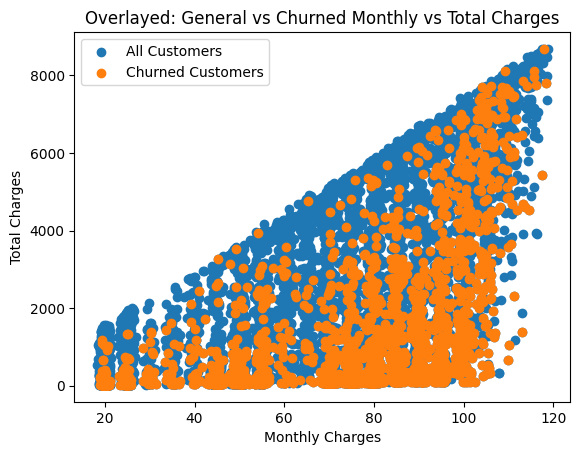

In [175]:
plt.scatter(x=df['MonthlyCharges'], y=df['TotalCharges'], label='All Customers')
plt.scatter(x=churned['MonthlyCharges'], y=churned['TotalCharges'], label='Churned Customers')

plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Overlayed: General vs Churned Monthly vs Total Charges')
plt.legend()
plt.show()


From this we can get to know that the customers who joined recently are the ones whic are getting churned and also the pwople who have used it for a long time at the higher price point are getting churned

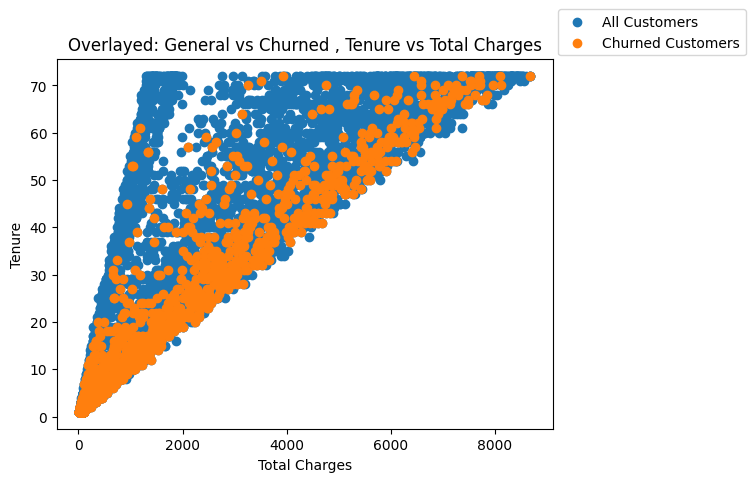

In [176]:
plt.scatter(x=df['TotalCharges'], y=df['tenure'], label='All Customers')
plt.scatter(x=churned['TotalCharges'], y=churned['tenure'], label='Churned Customers')

plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Overlayed: General vs Churned , Tenure vs Total Charges')
plt.legend(loc=(1.01,1.01))
plt.show()

Customers at early stages are getting churned more than the cusomers who been with the company for the longer duration

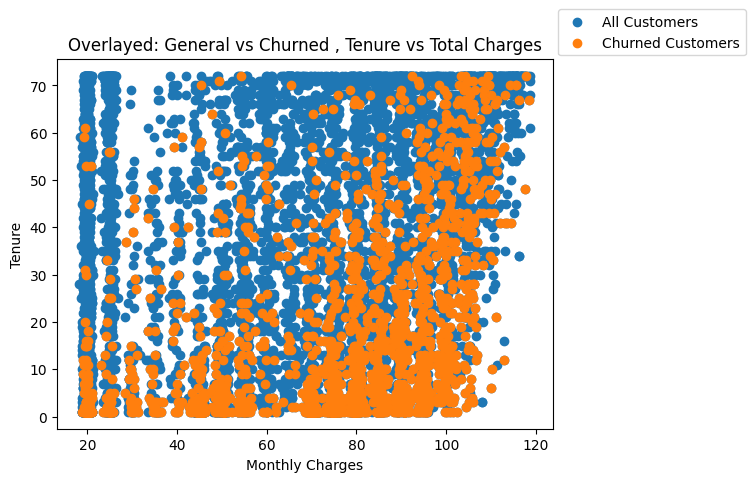

In [177]:
plt.scatter(x=df['MonthlyCharges'], y=df['tenure'], label='All Customers')
plt.scatter(x=churned['MonthlyCharges'], y=churned['tenure'], label='Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Overlayed: General vs Churned , Tenure vs Total Charges')
plt.legend(loc=(1.01,1.01))
plt.show()

The customers at the higher price point and with lower tenure are getting churned

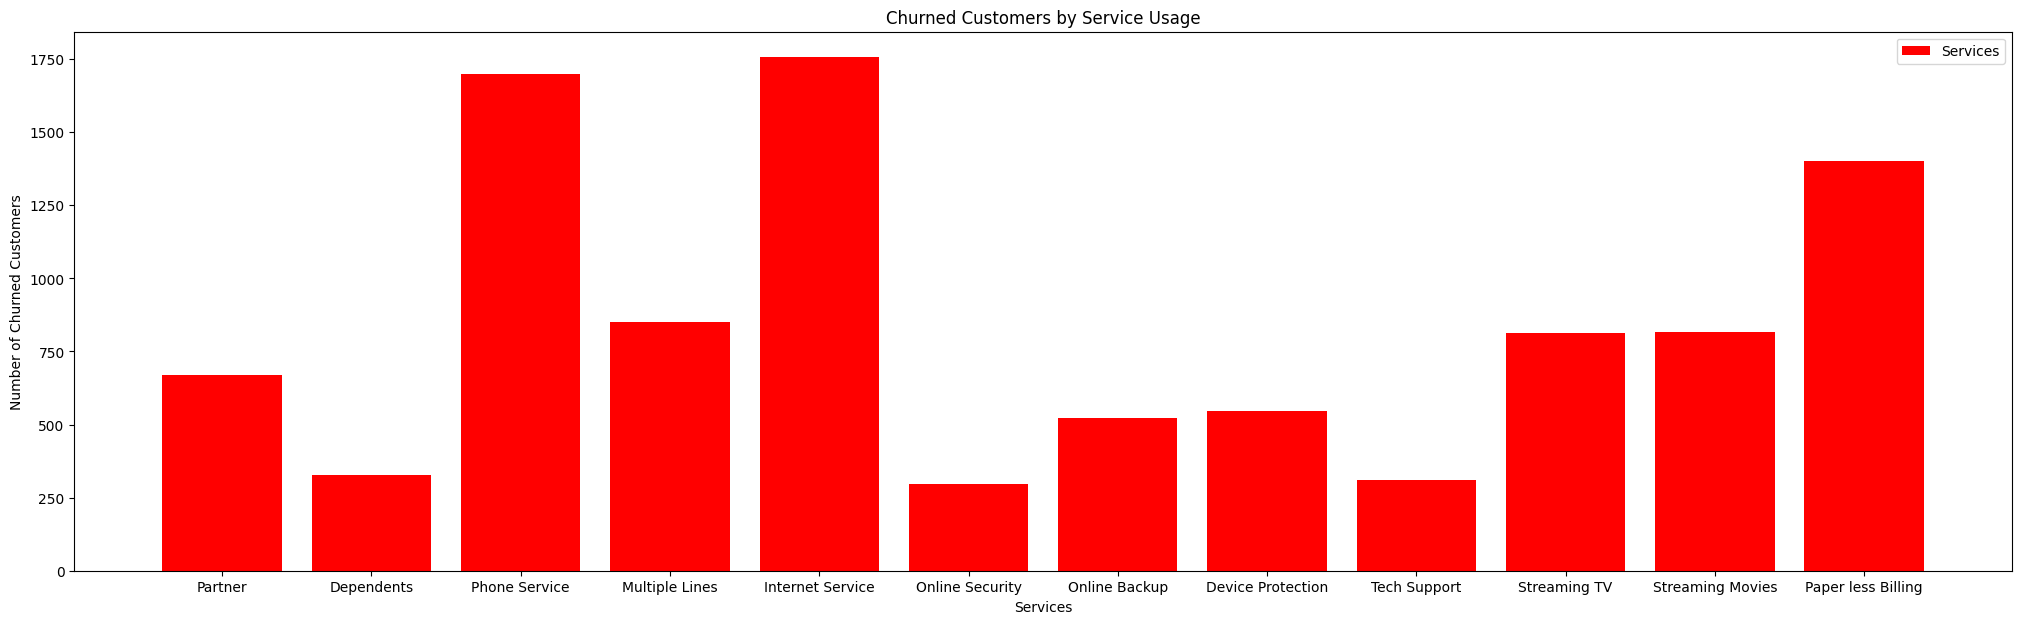

In [188]:
import matplotlib.pyplot as plt

# List of columns to count 'Yes' or non-'No' values
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies','PaperlessBilling']

# Count number of churned customers having each service
y = []
for col in cols:
    if col == 'InternetService':
        # Count if service is not 'No'
        y.append((churned[col] != 'No').sum())
    else:
        y.append((churned[col] == 'Yes').sum())

x = ['Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
     'Online Security','Online Backup','Device Protection','Tech Support',
     'Streaming TV','Streaming Movies','Paper less Billing']

# Plot
plt.figure(figsize=(25,7))
plt.bar(x, y, label='Services', color='red')
plt.xlabel('Services')
plt.ylabel('Number of Churned Customers')
plt.title('Churned Customers by Service Usage')
plt.legend()
plt.show()

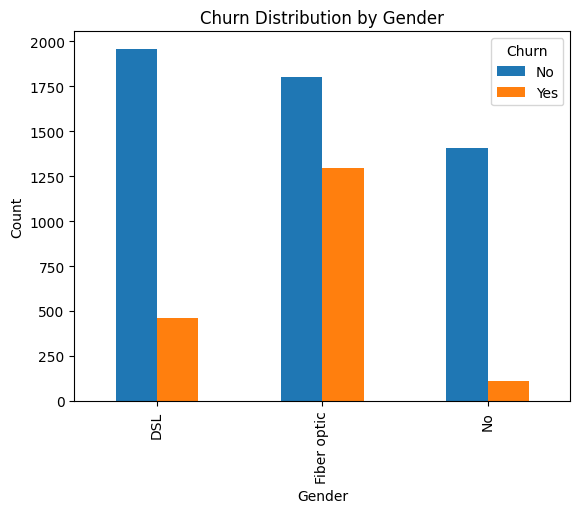

In [182]:
churn_df = df.groupby('InternetService')['Churn'].value_counts().unstack()


churn_df.plot(kind="bar")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

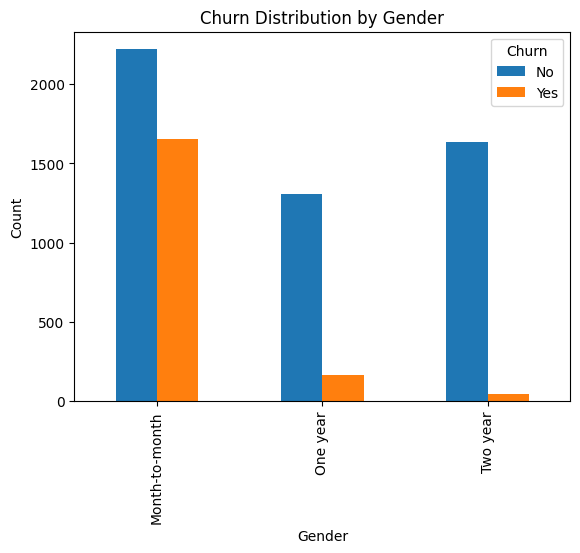

In [184]:
churn_df = df.groupby('Contract')['Churn'].value_counts().unstack()


churn_df.plot(kind="bar")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

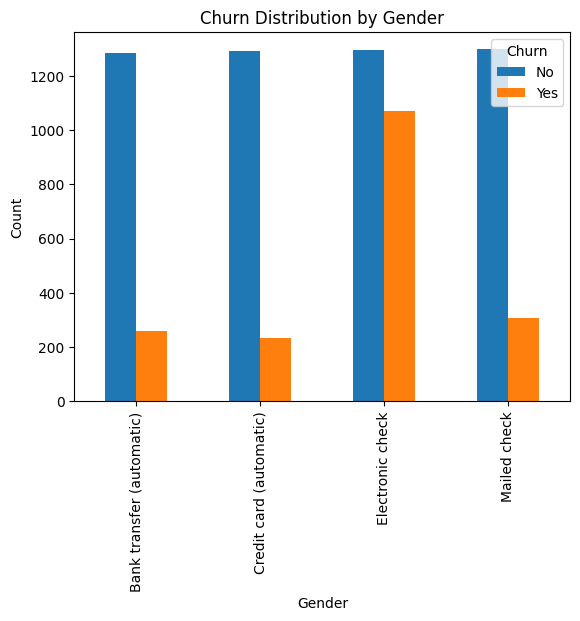

In [189]:
churn_df = df.groupby('PaymentMethod')['Churn'].value_counts().unstack()


churn_df.plot(kind="bar")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()